# DS4023 Machine Learning :  Linear Regression Exercise


## Part1 : Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.The file ``data1.txt`` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.


### Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path =  'data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
type(data)

pandas.core.frame.DataFrame

### Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

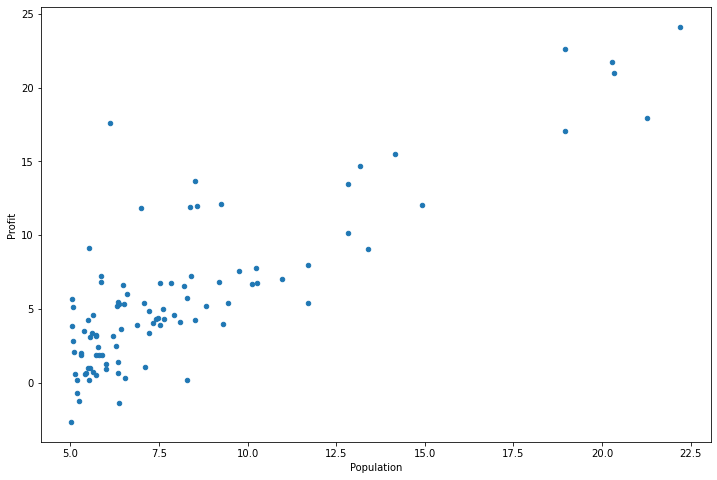

In [5]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (12, 8))
plt.show()

### Gradient Descent
In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent. The objective of linear regression is to minimize the cost function

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
where the hypothesis $h_{\theta}(x)$ is given by the linear model：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}\\] 
Recall that the parameters of your model are the $\theta_{j}$ values. These are the values you will adjust to minimize cost $J\left( \theta  \right)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$ (simultaneously update $\theta_{j}$ for all $j$)


#### 1. Computing the cost $J(\theta)$
- $\theta$ initialized to zeros 
- Implement the ``computeCost()`` function.  
   - Expected output for cost function value with initial $\theta$  setting is  32.07

In [6]:
def computeCost(X, y, theta):
    # your implementation
    # calculate error by using y_pred - y.
    # error = X.dot(theta) - y
    # df_T = pd.DataFrame(df.values.T,columns=index_row,index=index_colums)
    # cost = 1/2*len(X) * error.values.T.dot(error)
    # X = (X - X.min()) / (X.max() - X.min())
    # error = 0
    # for (x, y) in zip(data['Population'], data['Profit']):
    #     error += x * theta[0,1] + theta[0,0] - y
    # cost = float(1/2*len(X) * error**2)
    # calculate error by using y_pred - y.
    error = np.dot(X, theta.T) - y
    cost = float((0.5/len(X)) * np.dot(error.T, error))
    return cost

Insert a new column with ones:

In [7]:
data.insert(0, 'Ones', 1)

Data initialization

In [8]:
# set X (training data) and y (target variable)
# one_col = pd.DataFrame(np.ones(len(data.index)))
# X = pd.DataFrame(data['Population'])
# X = (X - X.min()) / (X.max() - X.min())
# X.insert(loc = 0, column = 'Ones', value = one_col)
X = data[['Ones', 'Population']]
y = pd.DataFrame(data['Profit'])  # code here

Check the training data and target variable:

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Initialize theta and convert the training and target data into numpy matrix

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
theta

matrix([[0, 0]])

In [13]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Calculate the cost function value:

In [14]:
computeCost(X, y, theta)

32.07273387745567

#### 2. Batch gradient decent
- ${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$
- Initial setting:
 - $\alpha=0.01$
 - iteration:1500
- Implement the ``gradientDescent()`` function. After implementation, run the gradient descent algorithm to get the paramters
  - Expected theta values (approx)(-3.6,1.17)
- Make sure to store the cost for each iteration in order to visualize the relationship between the cost and iterations

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
   # your implementation
   # initialize the cost array,
   # in order to store the cost value each iteration.
   cost = np.zeros(iters)
   # calculate the derivative of cost function.
   error = np.dot(X, theta.T) - y
   diff = 1/len(X) * np.dot(X.T, error)
   # enter the GD iteration process.
   for i in range(iters):
      # # use theta_prev to store the previous theta.
      # theta_prev = theta
      # update the value of data.
      theta = theta - alpha * diff.T
      # calculate the current cost.
      cost[i] = computeCost(X, y, theta)
      # # if the derivatives == 0, min has been reached.
      # # therefore, we halt the iteration.
      # if theta_prev.all() == theta.all():
      #    print(theta)
      #    break
      # calculate the derivative of cost function.
      error = np.dot(X, theta.T) - y
      diff = 1/len(X) * np.dot(X.T, error)
   return theta, cost

Initialization setting:

In [16]:
alpha = 0.01
iters = 1500

Run the gradient descent algorith to get the paramters
- Expected theta values (approx)(-3.6,1.17)

In [17]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

Finally, calculate the cost functio value using the parameters:

In [18]:
computeCost(X, y, g)

4.483388256587726

#### 3. Plotting the data and model

<Figure size 432x288 with 0 Axes>

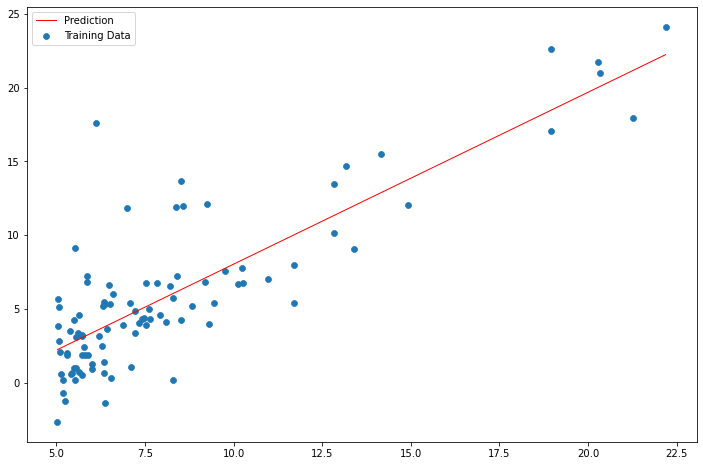

<Figure size 432x288 with 0 Axes>

In [19]:
# your implementation for plotting
# x_plot = np.linspace(data['Population'].min(), data['Population'].max(), 100)
# y_plot = x_plot * theta[0, 1] + theta[0, 0]
y_pred = np.dot(X, g.T)
x = np.arange(5.0269, 22.203, 0.02)
y_pred = g[0,0] + x * g[0,1]
plt.figure(figsize = (12, 8))
# plt.figure(dpi = 300, figsize = (8, 5))
# pd.DataFrame(y_pred).plot()
plt.plot(x, y_pred, linewidth = 1, color = 'red', label = 'Prediction')
plt.scatter(data['Population'], data['Profit'], linewidth = 0.7, label = 'Training Data')
# data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (12, 8))

# add some index into the plot.
plt.legend(('Prediction', 'Training Data'), loc = 'upper left', prop = {'size':10})
# show final plot.
plt.figure()

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


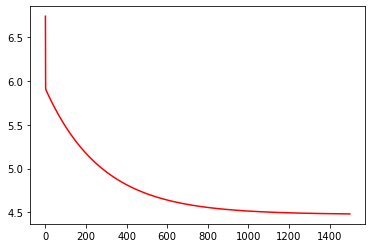

In [20]:
# your implementation for plotting
print(cost)
# pd.DataFrame(cost).plot(color = 'r', label = 'Cost')
plt.plot(pd.DataFrame(cost), color = 'r')